In [31]:
!pip install mecab-python3
!pip3 install unidic-lite
!pip install matplotlib
!pip install japanize-matplotlib
!pip install seaborn
!pip install setuptools
!pip install pandas
!pip install sqlalchemy

In [16]:
import requests
from bs4 import BeautifulSoup
import time
base_url = 'https://www.jalan.net/yad302508/kuchikomi/?screenId=UWW3701&idx=0&smlCd=161802&dateUndecided=1&yadNo=302508&distCd=01'
res = requests.get(base_url)
soup = BeautifulSoup(res.content, 'html.parser')
d_list = []
reviwes = soup.find_all('div', class_='jlnpc-kuchikomiCassette__contWrap')
for reviwe in reviwes:
    comments = reviwe.find('p', class_='jlnpc-kuchikomiCassette__lead')
    stars = reviwe.find('div', class_= 'jlnpc-kuchikomiCassette__totalRate')
    print(comments.text)
    print(stars.text)

    d = {
        'comments': comments.text,
        'stars': stars.text
    }
    print(d)

    d_list.append(d)



部屋の劣化が…

3
{'comments': '\n部屋の劣化が…\n', 'stars': '3'}

接客が素晴らしい！

5
{'comments': '\n接客が素晴らしい！\n', 'stars': '5'}

温泉がとても良かった

5
{'comments': '\n温泉がとても良かった\n', 'stars': '5'}

部屋以外はいつもと変わらず良かったです。

4
{'comments': '\n部屋以外はいつもと変わらず良かったです。\n', 'stars': '4'}

子連れにはもってこいの宿

4
{'comments': '\n子連れにはもってこいの宿\n', 'stars': '4'}

冬の蓼科温泉

4
{'comments': '\n冬の蓼科温泉\n', 'stars': '4'}

ご飯が美味しい！

5
{'comments': '\nご飯が美味しい！\n', 'stars': '5'}

初めてのガッカリ

2
{'comments': '\n初めてのガッカリ\n', 'stars': '2'}

子連れにおすすめ

4
{'comments': '\n子連れにおすすめ\n', 'stars': '4'}

10年ぶりに

4
{'comments': '\n10年ぶりに\n', 'stars': '4'}

子供も大人も満足

4
{'comments': '\n子供も大人も満足\n', 'stars': '4'}

リピーター

4
{'comments': '\nリピーター\n', 'stars': '4'}

いつも素敵に楽しませてもらってます

5
{'comments': '\nいつも素敵に楽しませてもらってます\n', 'stars': '5'}

癒やし一人旅

5
{'comments': '\n癒やし一人旅\n', 'stars': '5'}

温泉ごはんが最高！

4
{'comments': '\n温泉ごはんが最高！\n', 'stars': '4'}

子供も大変気に入っていました

5
{'comments': '\n子供も大変気に入っていました\n', 'stars': '5'}

温泉でのんびり

3
{'comments': '\n温泉でのんびり\n', 'stars': '3'}


In [17]:
url = 'https://www.jalan.net/yad302508/kuchikomi/{}.HTML'
for i in range(2,10):
    target_url = url.format(i)
    res = requests.get(target_url)
    print(target_url)
    soup = BeautifulSoup(res.content, 'html.parser')
    reviwes = soup.find_all('div', class_='jlnpc-kuchikomiCassette__contWrap')
    for reviwe in reviwes:
        comments = reviwe.find('p', class_='jlnpc-kuchikomiCassette__lead')
        stars = reviwe.find('div', class_= 'jlnpc-kuchikomiCassette__totalRate')
        print(comments.text)
        print(stars.text)

        d = {
            'comments': comments.text,
            'stars': stars.text
        }
        print(d)

        d_list.append(d)
    time.sleep(1)

https://www.jalan.net/yad302508/kuchikomi/2.HTML

食べ過ぎた！

4
{'comments': '\n食べ過ぎた！\n', 'stars': '4'}

渓流が見える露天風呂

4
{'comments': '\n渓流が見える露天風呂\n', 'stars': '4'}

楽しみ・悲しい・喜びの一泊

4
{'comments': '\n楽しみ・悲しい・喜びの一泊\n', 'stars': '4'}

残念

2
{'comments': '\n残念\n', 'stars': '2'}

キッズパークがお目当てで、満足！

4
{'comments': '\nキッズパークがお目当てで、満足！\n', 'stars': '4'}

温泉食事お部屋全て満喫しました

4
{'comments': '\n温泉食事お部屋全て満喫しました\n', 'stars': '4'}

結婚記念日のご褒美

5
{'comments': '\n結婚記念日のご褒美\n', 'stars': '5'}

お風呂が最高でした

3
{'comments': '\nお風呂が最高でした\n', 'stars': '3'}

子連れ家族旅行満足度星5つ

5
{'comments': '\n子連れ家族旅行満足度星5つ\n', 'stars': '5'}

キッズパークは良かった

3
{'comments': '\nキッズパークは良かった\n', 'stars': '3'}

極普通かな

3
{'comments': '\n極普通かな\n', 'stars': '3'}

部屋も食事も温泉も満足

5
{'comments': '\n部屋も食事も温泉も満足\n', 'stars': '5'}

ベビー、キッズにおすすめ

3
{'comments': '\nベビー、キッズにおすすめ\n', 'stars': '3'}

部屋の狭さにビックリしました

2
{'comments': '\n部屋の狭さにビックリしました\n', 'stars': '2'}

お風呂がよかった

4
{'comments': '\nお風呂がよかった\n', 'stars': '4'}

高いホスピタリティ

5
{'comments': '\n高いホスピタリティ\n',

In [18]:
print(len(d_list))

249


In [21]:
import pandas as pd
import MeCab

# 感情値辞書の読み込み
url = "http://www.lr.pi.titech.ac.jp/~takamura/pubs/pn_ja.dic"
response = requests.get(url)
# テキストを直接読み込む
lines = response.content.decode("shift-jis").split("\n")

# 辞書の作成
pndic = {}
for line in lines:
    parts = line.split(':')
    if len(parts) == 4:
        word = parts[0]
        score = float(parts[3])
        pndic[word] = score

# MeCabのTaggerオブジェクトを作成
tagger = MeCab.Tagger()

# 感情スコアを算出する関数
def calculate_sentiment_score(review, dic):
    node = tagger.parseToNode(review)
    score = 0
    word_count = 0

    while node:
        word = node.surface
        if word in dic:
            score += dic[word]
            word_count += 1
        node = node.next
    
    # 平均スコアを計算
    if word_count > 0:
        avg_score = score / word_count
    else:
        avg_score = 0
    
    return avg_score

In [22]:
# 感情スコアを算出する関数
def calculate_sentiment_score(review, dic):
    node = tagger.parseToNode(review)
    score = 0
    word_count = 0

    while node:
        word = node.surface
        if word in dic:
            score += dic[word]
            word_count += 1
        node = node.next
    
    # 平均スコアを計算
    if word_count > 0:
        avg_score = score / word_count
    else:
        avg_score = 0
    
    return avg_score

# 各口コミの感情スコアを計算して追加
for d in d_list:
    sentiment_score = calculate_sentiment_score(d['comments'], pndic)
    d['sentiment_score'] = sentiment_score

# DataFrameにして表示
reviews_df = pd.DataFrame(d_list, columns=["comments", "stars", "sentiment_score"])
print(reviews_df)

                     comments stars  sentiment_score
0                 \n部屋の劣化が…\n     3        -0.963416
1               \n接客が素晴らしい！\n     5         0.394372
2              \n温泉がとても良かった\n     5        -0.446536
3    \n部屋以外はいつもと変わらず良かったです。\n     4        -0.582710
4            \n子連れにはもってこいの宿\n     4        -0.592701
..                        ...   ...              ...
244                \nリーズナブル\n     4         0.000000
245                 \n残念な思い\n     1        -0.837311
246                   \nお風呂\n     4        -0.629613
247           \n子連れで宿泊しました。\n     4        -0.595816
248                  \n温泉最高\n     5        -0.583507

[249 rows x 3 columns]


In [28]:
import sqlite3
from sqlalchemy import create_engine
# SQLiteデータベースに接続
engine = create_engine('sqlite:///reviews.db')

# テーブル名を指定してDataFrameをDBに挿入
reviews_df.to_sql('reviews', con=engine, if_exists='replace', index=False)
reviews_df = reviews_df.sort_values(by=['stars'])

  stars  mean_sentiment_score  std_sentiment_score
0     1             -0.754042             0.139217
1     2             -0.888410             0.114318
2     3             -0.448997             0.377445
3     4             -0.322012             0.357437
4     5             -0.216606             0.431900


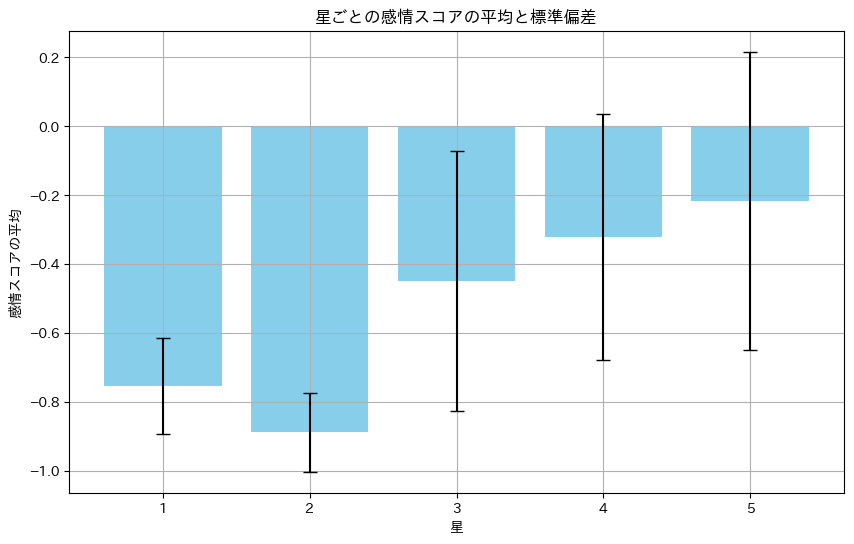

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

grouped_df = reviews_df.groupby('stars').agg({'sentiment_score': ['mean', 'std']}).reset_index()
grouped_df.columns = ['stars', 'mean_sentiment_score', 'std_sentiment_score']

print(grouped_df)

plt.figure(figsize=(10, 6))
plt.bar(grouped_df['stars'], grouped_df['mean_sentiment_score'], yerr=grouped_df['std_sentiment_score'], capsize=5, color='skyblue')
plt.title('星ごとの感情スコアの平均と標準偏差')
plt.xlabel('星')
plt.ylabel('感情スコアの平均')
plt.grid(True)

plt.show()